In [1]:
import numpy as np
import pandas as pd
import random
import json

In [2]:
rev = []
with open('Software_5.json') as f:
  for line in f:
    rev.append(json.loads(line))

#main dataframe
test = pd.DataFrame(columns=['Summary and Review', 'Rating'])

#adding data into dataframe 
for i in range(len(rev)):
    if('overall' in rev[i] and 'reviewText' in rev[i] and 'summary' in rev[i]):
        test.loc[i] = [rev[i]['summary'] + ' ' + rev[i]['reviewText'], rev[i]['overall']]
#function to turn ratings into two class
def rate(x):
    if(x>3):
        return 1
    elif(x<3):
        return 0
    else:
        return random.randint(0,1)
test['Rating'] = test['Rating'].apply(rate)


In [3]:
rev[0]
test

,Summary and Review,Rating
0,A solid overview of Dreamweaver CS5 I've been ...,1
1,A good value The demo is done with the PC vers...,1
2,This is excellent software for those who want ...,1
3,A Fantastic Overview of Dream Weaver and Web D...,1
4,Excellent Tutorials! I decided (after trying a...,1
...,...,...
12800,File Management Software with Basic Editing Ca...,1
12801,"Might not be for the ""novice"" This software ha...",1
12802,"Great, Inexpensive Software for Those Who Have...",1
12803,Gets the job done ... but not as easy as it sh...,1


In [4]:
test.loc[0]['Summary and Review']

"A solid overview of Dreamweaver CS5 I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from site design to actual implementation.  This course teaches you how to implement a design.  The user interface and overall user experience is a different subject that i

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_t2 = tfidf.fit_transform(test['Summary and Review'])

cvector = CountVectorizer(stop_words='english', ngram_range=(1,1), tokenizer=token.tokenize)
text_t = cvector.fit_transform(test['Summary and Review'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_t, test['Rating'], test_size=0.25, random_state=5)

In [7]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

#from sklearn.naive_bayes import BernoulliNB
#BNB = BernoulliNB()
#BNB.fit(X_train, Y_train)


#from sklearn.naive_bayes import GaussianNB
#GNB = GaussianNB()
#GNB.fit(X_train.todense(), Y_train)


#from sklearn.naive_bayes import ComplementNB
#CNB = ComplementNB()
#CNB.fit(X_train, Y_train)

from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print(str('{:04.2f}'.format(accuracy_score*100))+'%')

83.53%


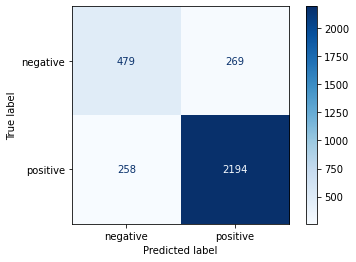

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(MNB, X_test, Y_test,
                        display_labels=['negative','positive'],
                        cmap=plt.cm.Blues)